<a href="https://colab.research.google.com/github/ccomploj/code/blob/main/01_Basics_of_NLP_and_Text_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP in Econ and Business


Textual information is omnipresent in today's digital age and plays a pivotal role in the business world. It is found in various forms such as social media communications (e.g., Twitter, Facebook), online shopping reviews (e.g., Amazon), corporate reports (e.g., 10-K, 10-Q), and corporate communications (e.g., earnings calls). Unlike numerical data, text provides detailed and nuanced insights that can reveal underlying sentiments, trends, and patterns.

In this session, we will delve into text analysis, commonly referred to as **Natural Language Processing (NLP)**. We will cover the basics of how to automatically extract meaningful information from textual data. Mastering this skill will empower us to uncover valuable insights and make informed, data-driven decisions based on textual content.

**Here is the detailed agenda of the session:**

1. Preparing text for analysis: the standard NLP pipeline
   - Tokenization: Breaking down text into individual words or phrases.
   - Text cleaning: Removing unwanted elements such as punctuation and stopwords to focus on meaningful content.
   - Lemmatization: Reducing words to their base or root form.
   - Regular Expressions (RegEx): Using patterns to search and manipulate text.
2. Use case: Earnings calls
   - Load data: Importing and preparing the dataset for analysis.
   - Data wrangling: Cleaning and transforming data to make it suitable for analysis.
3. NLP applications
   - Sentiment analysis: Determining the emotional tone behind a body of text.
   - Customized text mining: Extracting specific information tailored to particular needs or questions.


## Data Earnings conference calls

Throughout this course, we will work with a comprehensive dataset of earnings conference calls from S&P500 companies between 2015-2021. The dataset includes:

- Financial data from Compustat (e.g., assets, liabilities, revenues)
- Market data like stock returns and volatility measures
- Analyst estimates and earnings surprises from I/B/E/S
- The actual transcripts of earnings calls, split into presentation and Q&A sections

This rich dataset will allow us to explore various NLP techniques while working with real-world financial text data.


In [ ]:
# @title Load the textual data for the Earnings Calls of S&P500 from 2015 to 2021
import pandas as pd

# Load the Sample of Earnings Calls for the S&P500 from 2015 to 2021 with financials
Sample_EC = pd.read_csv("https://www.dropbox.com/scl/fi/2p7ahxroqj9pwf98ni5an/Sample_Calls.csv?rlkey=zfieicvz891u4e3z0aroeg0u7&dl=1")

# Load the Sample's Presentation texts
Sample_Presentations = pd.read_feather("https://www.dropbox.com/scl/fi/uceh2xva5g4apbmt92cgt/Sample_Calls_Presentations.feather?rlkey=ln4nzsa4nenqyvm0pg2cur9sp&dl=1")

# Load the Q&A session textual data for the sample
Sample_QAs = pd.read_feather("https://www.dropbox.com/scl/fi/iq4111nlmsykp2tzxk9xg/Sample_Calls_QA.feather?rlkey=xabjqmwhesx05jivrlfzkgj6m&dl=1")


## Note: column "file_name" is to be used for the merging

# ## Columns:
#     # Identifiers
#     "GVKEY": "A unique company identifier used by Compustat.",
#     "date_rdq": "The reporting date of the quarterly earnings or a related key event date.",
#     "co_conm": "The company’s name in CRSP.",

#     # Earnings Call Columns
#     "file_name": "The identifier or filename of the earnings call transcript.",
#     "CAR-11-Carhart": "Cumulative Abnormal Return over an event window using the Carhart 4-factor model.",
#     "CAR-11-ff3": "Cumulative Abnormal Return over an event window using the Fama-French 3-factor model.",
#     "CAR01-Carhart": "Cumulative Abnormal Return (alternative window) using the Carhart 4-factor model.",
#     "CAR01-ff3": "Cumulative Abnormal Return (alternative window) using the Fama-French 3-factor model.",
#     "IV": "Implied volatility (often from options) reflecting expected future stock price volatility.",
#     "hvol": "Historical volatility of the stock, based on past price movements.",
#     "IV_l1d": "Implied volatility lagged by one day.",
#     "IV_l2d": "Implied volatility lagged by two days.",
#     "IV_f1d": "Implied volatility forecasted or measured one day forward.",

#     # I/B/E/S Columns
#     "NUMEST": "The number of analyst estimates contributing to the consensus.",
#     "NUMUP": "The number of analysts who have revised their EPS estimates upward.",
#     "NUMDOWN": "The number of analysts who have revised their EPS estimates downward.",
#     "MEDEST": "The median of analyst EPS estimates.",
#     "MEANEST": "The mean of analyst EPS estimates.",
#     "ACTUAL": "The I/B/E/S standardized actual EPS figure, often adjusted for comparability.",
#     "surp": "The earnings surprise, typically ACTUAL minus MEANEST.",
#     "SurpDec": "A scaled or decimalized version of the earnings surprise.",

#     # Compustat Columns
#     "atq": "Total Assets (Quarterly)",
#     "actq": "Current Assets (Quarterly)",
#     "cheq": "Cash and Cash Equivalents (Quarterly)",
#     "rectq": "Accounts Receivable (Quarterly)",
#     "invtq": "Inventory (Quarterly)",
#     "ltq": "Total Liabilities (Quarterly)",
#     "lctq": "Current Liabilities (Quarterly)",
#     "apq": "Accounts Payable (Quarterly)",
#     "ceqq": "Total Equity (Quarterly)",
#     "seqq": "Common Equity (Quarterly)",

#     "capxy": "Capital Expenditures (Note: 'capxy' is annual by default, quarterly approximations derived from segments)",
#     "dpq": "Depreciation and Amortization (Quarterly)",
#     "saleq": "Revenue (Quarterly)",
#     "cogsq": "Cost of Goods Sold (Quarterly)",
#     "oiadpq": "Operating Income (Quarterly)",
#     "niq": "Net Income (Quarterly)",
#     "epspxq": "Basic Earnings Per Share (Quarterly)",
#     "epspiq": "Diluted Earnings Per Share (Quarterly)",
#     "dlttq": "Long-Term Debt (Quarterly)",
#     "dlcq": "Debt in Current Liabilities (Quarterly)",
#     "prccq": "Price Close - Fiscal Quarter",
#     "cshoq": "Common Shares Outstanding (Quarterly)",
#     "dvpq": "Dividends Paid (Quarterly)",
#     "xintq": "Interest Expense (Quarterly)"





In [ ]:
Sample_EC.head()

,GVKEY,date_rdq,co_conm,file_name,CAR-11-Carhart,CAR-11-ff3,CAR01-Carhart,CAR01-ff3,IV,hvol,...,oiadpq,niq,epspxq,epspiq,dlttq,dlcq,prccq,cshoq,dvpq,xintq
0,16101.0,2016-07-29 13:00:00+00:00,ABBVIE INC,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,0.011886,0.014261,0.014261,0.021246,0.179151,0.129186,...,2592.0,1610.0,0.99,0.99,37328.0,517.0,61.91,1628.542,0.0,245.0
1,16101.0,2016-04-28 13:00:00+00:00,ABBVIE INC,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,0.026387,0.023499,0.023499,0.021770,0.289777,0.114447,...,2384.0,1354.0,0.83,0.83,29490.0,2423.0,57.12,1617.359,0.0,215.0
2,16101.0,2016-10-28 13:00:00+00:00,ABBVIE INC,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,-0.078668,-0.079290,-0.079290,-0.092594,0.253269,0.381002,...,2564.0,1598.0,0.97,0.97,37284.0,26.0,63.07,1624.908,0.0,271.0
3,16101.0,2017-01-27 14:00:00+00:00,ABBVIE INC,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2017...,-0.010152,-0.000737,-0.000737,-0.005279,0.182080,0.145941,...,2461.0,1391.0,0.85,0.85,36440.0,402.0,62.62,1592.513,0.0,277.0
4,16101.0,2017-04-27 13:00:00+00:00,ABBVIE INC,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2017...,0.010397,0.010672,0.010672,0.012819,0.192822,0.112189,...,2444.0,1711.0,1.07,1.07,36526.0,425.0,65.16,1591.366,0.0,273.0


In [ ]:
Sample_Presentations.head()

,file_name,presentation
0,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,Good day and welcome to the Linear Technol...
1,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,Welcome to Cerner Corporation's first quar...
2,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,Welcome to Cerner Corporation's second qua...
3,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,Welcome to Cerner Corporation's third quar...
4,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2017...,Welcome to Cerner Corporation's fourth qua...


In [ ]:
Sample_QAs.head()

,QA,speaker_name,file_name,QA_text,QA_number
0,q,david wong,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,"Thanks very much. Don, could you give us some ...",1
1,a,don zerio,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,"Yes, David, as you know we retired our convert...",1
2,q,david wong,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,"Great, thanks.",2
3,q,craig hettenbach,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,Great thank you. Just a question on the commen...,3
4,a,lothar maier,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,"When you think about China you know, particula...",3


#### **Exercise**

Construct a DataFrame (named as `Sample_answers`) that combines the Sample_EC data with a consolidated view of all management responses from the earnings calls.

In [ ]:
# Step 1: fileter for only answers in the Sample_QAs

temp = Sample_QAs[Sample_QAs['QA'] == 'a']

# Step 2: Generate Earnings call level data by aggregating in the file_name level
 # file name is a earnings call, and here I aggregate ALL THE TEXT of the QA into a single long text, and merge it as an additional column
temp = temp.groupby('file_name')['QA_text'].apply(lambda x: ' '.join(x)).reset_index()

# Step 3: Merge with Sample_EC and name it as Sample_Answers
Sample_answers = Sample_EC.merge(temp)

In [ ]:
Sample_answers

,GVKEY,date_rdq,co_conm,file_name,CAR-11-Carhart,CAR-11-ff3,CAR01-Carhart,CAR01-ff3,IV,hvol,...,niq,epspxq,epspiq,dlttq,dlcq,prccq,cshoq,dvpq,xintq,QA_text
0,16101.0,2016-07-29 13:00:00+00:00,ABBVIE INC,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,0.011886,0.014261,0.014261,0.021246,0.179151,0.129186,...,1610.0,0.99,0.99,37328.0,517.0,61.91,1628.542,0.0,245.0,"Jeff, this is Rick. I will cover the first and..."
1,16101.0,2016-04-28 13:00:00+00:00,ABBVIE INC,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,0.026387,0.023499,0.023499,0.021770,0.289777,0.114447,...,1354.0,0.83,0.83,29490.0,2423.0,57.12,1617.359,0.0,215.0,"Okay. Hi, Jeff, it's Rick. So I'll take I gues..."
2,16101.0,2016-10-28 13:00:00+00:00,ABBVIE INC,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,-0.078668,-0.079290,-0.079290,-0.092594,0.253269,0.381002,...,1598.0,0.97,0.97,37284.0,26.0,63.07,1624.908,0.0,271.0,"Sure, Jami; this is Rick. Thank you for the qu..."
3,16101.0,2017-01-27 14:00:00+00:00,ABBVIE INC,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2017...,-0.010152,-0.000737,-0.000737,-0.005279,0.182080,0.145941,...,1391.0,0.85,0.85,36440.0,402.0,62.62,1592.513,0.0,277.0,"Hi, Jami; it's Bill. So on your operating marg..."
4,16101.0,2017-04-27 13:00:00+00:00,ABBVIE INC,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2017...,0.010397,0.010672,0.010672,0.012819,0.192822,0.112189,...,1711.0,1.07,1.07,36526.0,425.0,65.16,1591.366,0.0,273.0,"Yes. Well, first, thanks for the question. May..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872,189491.0,2016-11-01 13:00:00+00:00,XYLEM INC,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,-0.022716,-0.023069,-0.023069,-0.015313,0.238038,0.176583,...,73.0,0.41,0.41,1148.0,62.0,52.45,179.400,0.0,12.0,"Yes, well, thanks for the question, Jim. First..."
2873,189491.0,2016-08-02 13:00:00+00:00,XYLEM INC,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,-0.036201,-0.034737,-0.034737,-0.037363,0.201698,0.213624,...,71.0,0.39,0.39,1143.0,91.0,44.65,179.200,0.0,12.0,"Sure, Deane. Let me just characterize what we ..."
2874,189491.0,2020-07-30 13:00:00+00:00,XYLEM INC,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2020...,-0.030116,-0.028020,-0.028020,-0.049431,0.325614,0.345711,...,31.0,0.17,0.17,3031.0,269.0,64.96,180.000,0.0,18.0,"That is correct, Dean, on both counts. Sure. Y..."
2875,189491.0,2018-05-01 13:00:00+00:00,XYLEM INC,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2018...,-0.066260,-0.064927,-0.064927,-0.058477,0.206359,0.215869,...,79.0,0.44,0.44,2228.0,371.0,76.92,179.500,0.0,21.0,"Yes, I'll go first here, Nate. And I think the..."


## Pre-processing Textual Data

Pre-processing textual data is a crucial step in Natural Language Processing (NLP). Python offers several libraries to help with this task, each with its own strengths. Here are some popular options:

- **NLTK toolkit:** Provides a clear and easy-to-understand syntax, making it ideal for demonstrating standard NLP operations.
- **spaCy:** Known for its fast and robust processing capabilities, suitable for both research and production environments.
- **Gensim:** Specializes in topic modeling and document similarity analysis.
- **TextBlob:** Offers a simple API for common NLP tasks such as part-of-speech tagging, noun phrase extraction, and sentiment analysis.
- **Stanford CoreNLP:** A comprehensive suite of NLP tools supporting multiple languages, typically accessed via a server.

In this notebook, we will primarily use the **NLTK toolkit** to demonstrate standard NLP operations.

**Note:** Ensure that you have installed all the required libraries before running the code examples.


In [ ]:
# Import numpy for numerical operations
import numpy as np

# Import NLTK (Natural Language Toolkit) - the main library we'll use for NLP tasks
import nltk

# Download required NLTK data packages:

# punkt: For sentence tokenization and word tokenization
nltk.download('punkt', quiet=True)

# stopwords: Common words that usually don't add meaning (e.g., "the", "is", "at")
nltk.download('stopwords', quiet=True)

# wordnet: Lexical database for English - used for lemmatization
nltk.download('wordnet', quiet=True)

# averaged_perceptron_tagger: For part-of-speech tagging (identifying nouns, verbs, etc.)
nltk.download('averaged_perceptron_tagger', quiet=True)

# punkt_tab: Additional tokenization models
nltk.download('punkt_tab', quiet=True)

# averaged_perceptron_tagger_eng: English-specific part-of-speech tagger
nltk.download('averaged_perceptron_tagger_eng', quiet=True)

# Note: quiet=True suppresses download progress messages
# These downloads only need to happen once - NLTK will use local copies afterwards

True


 Example Texts
We'll use two example texts to demonstrate NLP techniques:
- A short text: Simple "Hello world" message
- A longer text: A passage from Alice in Wonderland that contains multiple sentences, questions, and punctuation



In [ ]:

# Let's compare a short and long text
short_text = "Hello world!"

### triple """ refers to a whole text block
long_text = """
        I wonder if I have been changed in the night. Let me think. Was I the same when I got up this morning?
        I almost can remember feeling a little different. But if I am not the same, the next question is ' Who in the world am I? '
        Ah, that is the great puzzle!
       """

# We'll use both texts to demonstrate how NLP techniques work differently on texts of varying lengths
text = long_text  # We'll primarily use the long text for our examples



### Tokenization
**Tokenization** is a fundamental NLP technique that breaks down text into smaller units called tokens. These tokens can be:
- Words (most common)
- Phrases
- Sentences
- Characters
- Subwords (e.g., WordPiece, BPE)

Why is tokenization important?
1. It's the first step in most NLP pipelines
2. It converts unstructured text into structured format for analysis
3. Different tokenization strategies can significantly impact model performance

Common tokenization approaches:
- **Word tokenization**: Splits on whitespace and punctuation ("Hello world!" → ["Hello", "world"])
- **Sentence tokenization**: Splits text into sentences
- **Subword tokenization**: Handles unknown words by breaking them into meaningful subunits

In this notebook, we'll focus on word tokenization as it's the most common approach for basic NLP tasks like sentiment analysis and text classification.

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*PZYP2nL6Zc_jpkaHLRxLQQ.png" alt="Tokenization example showing text split into words" width="400"/>


In [ ]:
# Import NLTK's word_tokenize function for splitting text into tokens
from nltk.tokenize import word_tokenize

# Tokenize the input text into individual words and punctuation
# word_tokenize handles:
# - Splitting on whitespace
# - Separating punctuation
# - Preserving contractions (e.g. "don't" -> ["do", "n't"])
tokens = nltk.word_tokenize(text)
  ### nltk countsa specific number of tokens -- it could be that it is not the correct splitting of sections into tokens.

# Print the total number of tokens found
print('The text has {} tokens.'.format(len(tokens)))

# Print the actual tokens to see how the text was split
print(tokens)

# Print the data type of the tokens variable (should be a list)
print(type(tokens))

The text has 64 tokens.
['I', 'wonder', 'if', 'I', 'have', 'been', 'changed', 'in', 'the', 'night', '.', 'Let', 'me', 'think', '.', 'Was', 'I', 'the', 'same', 'when', 'I', 'got', 'up', 'this', 'morning', '?', 'I', 'almost', 'can', 'remember', 'feeling', 'a', 'little', 'different', '.', 'But', 'if', 'I', 'am', 'not', 'the', 'same', ',', 'the', 'next', 'question', 'is', "'", 'Who', 'in', 'the', 'world', 'am', 'I', '?', "'", 'Ah', ',', 'that', 'is', 'the', 'great', 'puzzle', '!']
<class 'list'>


#### Exercise: Analyzing Earnings Call Presentation Lengths

Find the longest and shortest earnings call presentations in our sample by:
1. Counting words in each presentation from Sample_Presentations
2. Merging with company identifiers from Sample_EC using "file_name" as the key
3. Identifying the min and max length presentations and their associated companies

This will help us understand the range of presentation lengths and which companies
tend to give longer or shorter presentations.

In [ ]:
# Count words in each presentation
Sample_Presentations['word_count'] = Sample_Presentations['presentation'].str.split().str.len()

# Merge with company identifiers from Sample_EC
merged_df = pd.merge(Sample_Presentations, Sample_EC[['file_name', 'co_conm']], on='file_name')

# Find shortest and longest presentations
shortest = merged_df.loc[merged_df['word_count'].idxmin()]
longest = merged_df.loc[merged_df['word_count'].idxmax()]


print("Shortest presentation:")
print(f"Company: {shortest['co_conm']}")
print(f"Word count: {shortest['word_count']}")
print(f"\nLongest presentation:")
print(f"Company: {longest['co_conm']}")
print(f"Word count: {longest['word_count']}")



Shortest presentation:
Company: NETFLIX INC
Word count: 0

Longest presentation:
Company: SOUTHERN CO
Word count: 13903


In [ ]:
# Calculate average word count
median_word_count = merged_df['word_count'].median()

print(f"\nMedian word count: {median_word_count:.2f} words")
print(f"Company with median wordcount: {merged_df.loc[merged_df['word_count'] == median_word_count, 'co_conm'].values}")



Median word count: 3211.00 words
Company with median wordcount: ['SEALED AIR CORP']


<Axes: >

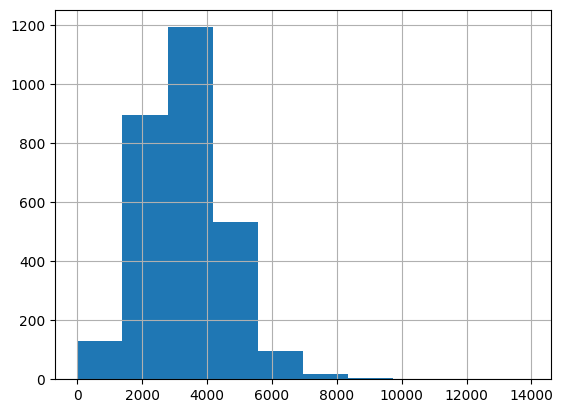

In [ ]:
merged_df['word_count'].hist()

### Punctuation
Punctuation marks serve important structural and grammatical purposes in language. However, their treatment varies across different NLP applications and models:

- **Advanced Models**: Models like BERT and GPT preserve punctuation since it provides useful syntactic and semantic information
- **Simple Models**: Often remove punctuation to reduce noise and vocabulary size
- **Task-Dependent**: The choice depends on the specific NLP task and model architecture

For our basic language modeling task, we'll remove punctuation marks and other special characters to:
1. Simplify the text representation
2. Reduce vocabulary size
3. Focus on core word meanings

We'll also convert text to lowercase to standardize the tokens.

<img src="https://media.licdn.com/dms/image/v2/C5112AQGIYRI4mJsz4Q/article-cover_image-shrink_600_2000/article-cover_image-shrink_600_2000/0/1520086324378?e=2147483647&v=beta&t=U4ZQrYxTgdXGwJrjdGbbFiQC4ifaRzivsgYdzplAmNY" alt="image.png" width="300"/>


In [ ]:
# Start with cleaning the text: convert to lower case and keep only alphanumeric characters
tokens2 = [word.lower() for word in tokens if word.isalpha()]
# print the removed non-alphanumeric characters
print(f'The removed tokens are: {[word.lower() for word in tokens if not word.isalpha()]}')
print('The remaining text has {} tokens.'.format(len(tokens2)))
print('Remaining tokens:',tokens2)

The removed tokens are: ['.', '.', '?', '.', ',', "'", '?', "'", ',', '!']
The remaining text has 54 tokens.
Remaining tokens: ['i', 'wonder', 'if', 'i', 'have', 'been', 'changed', 'in', 'the', 'night', 'let', 'me', 'think', 'was', 'i', 'the', 'same', 'when', 'i', 'got', 'up', 'this', 'morning', 'i', 'almost', 'can', 'remember', 'feeling', 'a', 'little', 'different', 'but', 'if', 'i', 'am', 'not', 'the', 'same', 'the', 'next', 'question', 'is', 'who', 'in', 'the', 'world', 'am', 'i', 'ah', 'that', 'is', 'the', 'great', 'puzzle']



#### Special Considerations for Social Media Text

While punctuation is often treated as "noise" in traditional NLP tasks, research in marketing shows that textual paralanguage can be highly meaningful in social media communication. Punctuation and special characters often convey:
- Emotion
- Emphasis  
- Additional context
- User engagement signals

**Consider these examples:**
- "This coffee is amazing" (neutral statement)
- "This coffee is amazing!!!!!!" (high enthusiasm)
- "This coffee is amazing. ⋆彡" (decorative/playful)
- "This coffee is amazing. Holy S#!T." (intense reaction)

These variations can significantly impact social media engagement metrics like likes, comments, and shares.

For more details, see: https://journals.sagepub.com/doi/full/10.1177/00222437221116058?casa_token=_UhxHAIrKfMAAAAA%3AyHAQTHQhYZN3-fF25pkRhIMRU6i75oM51o3VIEZvHDGoFDd9bdo3F6G2HPrkbFbSy3041r9xrRwY0Q

This is starting to look like a dictionary already, right? There are some more issues we want to address though. Like 'stop words' - semantically they do not mean much but serve to put sentences together ("the", "a", "and", etc) - they will add noise. NLTK can offer you its own list of stop words.

### Understanding N-grams: Bi-grams, Tri-grams, and Beyond
## NOTE: APPLE COULD HAVE A MEANING OF A COMPANY BUT ALSO A FRUIT

N-grams are contiguous sequences of 'n' items from a given text or speech.
They are a fundamental concept in natural language processing (NLP) for analyzing the structure of text data.

- **Uni-grams**: Single words. Useful for basic frequency analysis.
- **Bi-grams**: Pairs of consecutive words. Capture simple relationships and context between words.
- **Tri-grams**: Triplets of consecutive words. Provide more context than bi-grams, capturing more complex relationships.
- **N-grams**: General term for any 'n' number of consecutive words. As 'n' increases, the context captured becomes richer.

**Trade-offs of Higher N-grams:**
1. **Increased Context**: Higher n-grams capture more context, which can be useful for understanding complex language patterns.
2. **Data Sparsity**: As 'n' increases, the number of possible n-grams grows exponentially, leading to sparsity in data. This can make it difficult to find meaningful patterns.
3. **Computational Cost**: Higher n-grams require more computational resources for processing and storage, which can be a limitation for large datasets.
4. **Overfitting Risk**: With more context, there's a risk of overfitting to the training data, capturing noise rather than meaningful patterns.



In [ ]:
from nltk import ngrams

# Function to generate n-grams
def generate_ngrams(tokens, n):
    return list(ngrams(tokens, n))

# Example usage
bigrams = generate_ngrams(tokens2, 2)
trigrams = generate_ngrams(tokens2, 3)

# Print some examples
print("Bigrams:", bigrams[:5])
print("Trigrams:", trigrams[:5])


Bigrams: [('i', 'wonder'), ('wonder', 'if'), ('if', 'i'), ('i', 'have'), ('have', 'been')]
Trigrams: [('i', 'wonder', 'if'), ('wonder', 'if', 'i'), ('if', 'i', 'have'), ('i', 'have', 'been'), ('have', 'been', 'changed')]


---

### Discussion: Optimal n-gram size?

---

### Stopwords
**Stopwords** are common words in a language that are often removed from text data during processing because they usually **carry less meaningful information for analytical tasks**.

Examples of stopwords in English include:
- Articles: "a", "an", "the"
- Prepositions: "in", "on", "at", "with"
- Conjunctions: "and", "but", "or"
- Pronouns: "I", "you", "he", "she", "it"
- Common verbs: "is", "are", "be", "have"

Benefits of removing stopwords:
1. Reduces noise in text analysis
2. Decreases computational complexity
3. Focuses analysis on meaningful content words
4. Improves performance of topic modeling and text classification

However, stopword removal should be used carefully as these words may be important for:
- Sentiment analysis (e.g., "not" changes meaning)
- Grammar-dependent tasks
- Named entity recognition

<img src="https://wisdomml.in/wp-content/uploads/2022/08/stop_feat.png" alt="image.png" width="500"/>


In [ ]:
# Remove stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words("english")


print('There are in total {} stopwords in the stopword dictionary.'.format(len(stop_words)))
# list the first 10 stop words from the stop_words list
stop_words[0:20]

There are in total 198 stopwords in the stopword dictionary.


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been']

The list of stop words looks comprehensive. However, say you miss a 'stop word' that you would also like to filter. You can extend the above list easily. After all, it is just a list.

In [ ]:
t = type(stop_words)
print('Data type of stopwords is:', t )

Data type of stopwords is: <class 'list'>


### Other non standard stopwords?
Beyond the standard NLTK stopwords, you may want to add domain-specific or custom stopwords:

Common cases for additional stopwords:
- Domain-specific filler words (e.g., "etc", "ie", "eg")
- Social media terms (e.g., "rt" for retweet)
- Website-specific terms (e.g., "click", "link", "subscribe")
- Numbers and dates when not relevant
- Common abbreviations
- Profanity or unwanted terms

The decision to add custom stopwords should be based on:
1. Your specific analysis goals
2. The nature of your text data
3. Domain knowledge
4. Preliminary analysis of word frequencies

Below we'll see how to add custom stopwords to the standard list.

In [ ]:
# Add some custom stopwords
stop_words.append('some_word_you_dont_like')  # you can apply all the functions for lists
# show the last stop word in the list
stop_words[-1]

'some_word_you_dont_like'

Here is the actual filtering; no function, just native Python code.

In [ ]:
# Filter stop words using, e.g., list comprehension
tokens3 = [word for word in tokens2 if word not in stop_words]
# print the removed tokens
print('Removed tokens:', [word for word in tokens2 if word in stop_words])
print('The remaining text has {} tokens.'.format(len(tokens3)))
print('Remaining tokens:',tokens3)

Removed tokens: ['i', 'if', 'i', 'have', 'been', 'in', 'the', 'me', 'was', 'i', 'the', 'same', 'when', 'i', 'up', 'this', 'i', 'can', 'a', 'but', 'if', 'i', 'am', 'not', 'the', 'same', 'the', 'is', 'who', 'in', 'the', 'am', 'i', 'that', 'is', 'the']
The remaining text has 18 tokens.
Remaining tokens: ['wonder', 'changed', 'night', 'let', 'think', 'got', 'morning', 'almost', 'remember', 'feeling', 'little', 'different', 'next', 'question', 'world', 'ah', 'great', 'puzzle']


### Lemmatization and Stemming
When analyzing financial texts like earnings reports, regulatory filings, or market commentary, words often appear in different forms but mean the same thing. For example, "investing", "invested", and "investment" all relate to the same core concept. This variation can make text analysis challenging. **Stemming** and **lemmatization** help solve this problem by reducing words to their base forms.

**Stemming** is a simple but aggressive approach that removes word endings to get the root form. It works by chopping off suffixes using predefined rules, even if the result isn't a real word. In financial contexts:
 - "investing", "invested", "investments" → "invest"
 - "profitable", "profitability" → "profit"
 - "accounting", "accounted", "accounts" → "account"
While fast, stemming can sometimes produce non-words or combine distinct terms.

**Lemmatization** is more sophisticated and uses dictionary knowledge to reduce words to their proper base form (lemma). It considers the word's context and part of speech to ensure accurate results. In financial texts:
 - "was", "is", "are", "being" → "be"
 - "better", "best" → "good"
 - "assets", "asset's" → "asset"
 - "bought", "buying" → "buy"

The choice between stemming and lemmatization depends on your needs:
- Stemming is faster but less accurate - good for quick analysis of large financial datasets
- Lemmatization is slower but more precise - better for detailed analysis of financial statements or regulatory documents where accuracy is critical

Both techniques help standardize text data, making it easier for NLP algorithms to:
1. Calculate accurate word frequencies in financial reports
2. Identify key themes and topics across multiple documents
3. Compare similar concepts expressed in different ways
4. Build more effective financial text classification models

<img src=" https://media.licdn.com/dms/image/C4D12AQEZCHQOHXSEhg/article-cover_image-shrink_600_2000/0/1650689035153?e=2147483647&v=beta&t=uRsPEF-Apt9EvVTcUGR_ZhAs_Dk39de4MFQDo78LHos" alt="image.png" width="500"/>

In [ ]:
## i wrote this block
from nltk.stem import *
# Example of joining tokens with spaces
print(" ".join(tokens3))

# Example of using a stemmer
porter = PorterStemmer()
print(porter.stem("running"))

wonder changed night let think got morning almost remember feeling little different next question world ah great puzzle
run


In [ ]:
# Poter Stemmer
from nltk.stem import PorterStemmer # can have different stemmers to do this
stemmer = PorterStemmer()
[stemmer.stem(word) for word in tokens3]

['wonder',
 'chang',
 'night',
 'let',
 'think',
 'got',
 'morn',
 'almost',
 'rememb',
 'feel',
 'littl',
 'differ',
 'next',
 'question',
 'world',
 'ah',
 'great',
 'puzzl']

Let's now take a look on lemmatization. Here, things are a little more complicated. While NLTK offers a ready-to-use function, we need to tell it the grammatical form of the word that we want to lemmatize. Consider this example:

In [ ]:
# WordNet Lemmatizer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# You need to choose the type of word:
print(lemmatizer.lemmatize("stripes", 'n'))
print(lemmatizer.lemmatize("stripes", 'v')) # what happens if we claim this is a verb?

stripe
strip


How would we know that grammatical form?

In NLP, we determine the grammatical form of a word in text using **part-of-speech (POS) tagging**. POS tagging algorithms analyze each word's context within a sentence and assign it a grammatical category like:

- Nouns (NN): person, place, thing (e.g., "stock", "market", "trader")
- Verbs (VB): action words (e.g., "buy", "sell", "trade")
- Adjectives (JJ): descriptive words (e.g., "bullish", "volatile", "profitable")
- Adverbs (RB): modify verbs/adjectives (e.g., "quickly", "sharply", "gradually")

The NLTK library provides a POS tagger that automatically labels each word with its grammatical category. This helps us apply the correct form of lemmatization. Here's how to use it:


In [ ]:
nltk.pos_tag(["She", "earned", "her", "stripes", "with", "great", "performance"])

[('She', 'PRP'),
 ('earned', 'VBD'),
 ('her', 'PRP'),
 ('stripes', 'NNS'),
 ('with', 'IN'),
 ('great', 'JJ'),
 ('performance', 'NN')]

We make use of the above POS tagger later. For now, let's simply use the lemmatizer to map nouns and verbs to their dictionary form.

In [ ]:
# goes through each word in the list tokens3, applies lemmatization with noun (pos='n') as the part of speech.
tokens4 = [lemmatizer.lemmatize(word, pos='n') for word in tokens3]
# re-lemmatizes each word in the newly created tokens4, but this time with verb (pos='v') as the part of speech.
tokens4 = [lemmatizer.lemmatize(word, pos='v') for word in tokens4]
# This double lemmatization step helps capture words in their base forms for both noun and verb contexts.
print('Tokens before lemmatization:',tokens3)
print('Tokens after lemmatization:',tokens4)

Tokens before lemmatization: ['wonder', 'changed', 'night', 'let', 'think', 'got', 'morning', 'almost', 'remember', 'feeling', 'little', 'different', 'next', 'question', 'world', 'ah', 'great', 'puzzle']
Tokens after lemmatization: ['wonder', 'change', 'night', 'let', 'think', 'get', 'morning', 'almost', 'remember', 'feel', 'little', 'different', 'next', 'question', 'world', 'ah', 'great', 'puzzle']


## Regex (Regular Expressions)

Regular expressions (regex) are powerful patterns used to match, search, and manipulate text strings. They provide a flexible way to find and process text based on specific patterns. Here are the key concepts:

**Basic Patterns:**
- Literal characters match themselves (e.g., 'a' matches the letter 'a')
- Special characters have special meanings:
  - `.` matches any single character
  - `*` matches 0 or more repetitions
  - `+` matches 1 or more repetitions
  - `?` matches 0 or 1 repetition
  - `[]` defines a character class (e.g., `[0-9]` matches any digit)
  - `{n}` matches exactly n repetitions
  - `{n,}` matches n or more repetitions
  - `{n,m}` matches between n and m repetitions
  - `^` matches start of line
  - `$` matches end of line

**Common Use Cases:**
- Email validation: `[\w\.-]+@[\w\.-]+\.\w+`
- Phone numbers: `\d{3}[-.]?\d{3}[-.]?\d{4}`
- Dates: `\d{4}-\d{2}-\d{2}`
- URLs: `https?://[\w\.-]+\.\w+`

**Python's re Module Functions:**
- `re.search()`: Find first match
- `re.findall()`: Find all matches
- `re.sub()`: Replace matches
- `re.split()`: Split string by pattern
- `re.escape()`: Escape all non-alphanumeric characters in a string, turning them into literal characters. This is useful when you want to match a string that contains special regex characters.

For example, to find all email addresses in text:
```python
import re
pattern = r'[\w\.-]+@[\w\.-]+\.\w+'
emails = re.findall(pattern, text)
```

If you have a string with special characters and you want to match it literally, use `re.escape()`:
```python
special_string = "example.com?query=1"
escaped_string = re.escape(special_string)
print(escaped_string)  # Output: example\.com\?query=1
```

For more details, check Python's [re module documentation](https://docs.python.org/3/library/re.html).

A Cool Interactive Website : [regex101.com](https://regex101.com/)


In [ ]:
re_demo = """
            This text includes the email address of Mansouri <s.mansouri@rug.nl>.
            Also, we use <em>html</em> to <b>emphasize</b> parts and include breaks <br> to separate lines.
"""

Finding or filtering email addresses is a common use case when processing text.

In [ ]:
# Finding emails usig regex
import re  # Python library for regular expressions

# Simple pattern to match email addresses
pat = '([\w\.-]+@[\w\.-]+\.[\w]+)+'
# Extracting email addresses
email = re.findall(pat, re_demo)
print('Found: ', email)

# replace email addresses with a placeholder, that way the email addresses is removed
re.sub(pat, '', re_demo)

Found:  ['s.mansouri@rug.nl']


<>:5: SyntaxWarning: invalid escape sequence '\w'
<>:5: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-48123344.py:5: SyntaxWarning: invalid escape sequence '\w'
  pat = '([\w\.-]+@[\w\.-]+\.[\w]+)+'


'\n            This text includes the email address of Mansouri <>.\n            Also, we use <em>html</em> to <b>emphasize</b> parts and include breaks <br> to separate lines.\n'


#### **Exercise: Identifying Numerical Mentions in Earnings Calls**  

According to **Campbell et al. (2021)**, *Quantitative Textual Disclosure*, which refers to the frequency with which managers mention numerical data, can enhance firm value and elicit a positive market response.  

Let's explore this phenomenon using our sample of **earnings call transcripts** by identifying and analyzing numerical mentions within the text.  

 **Step 1: Understanding Numerical Mentions**  
Numerical mentions include:  
- **Whole numbers** (e.g., *10, 500, 2023*)  
- **Decimals & percentages** (e.g., *3.5, 12.75, 50%*)  
- **Monetary figures** (e.g., *$1 million, €500K*)  
- **Ratios & growth rates** (e.g., *2:1, +15% YoY*)  

 **Step 2: Using Regular Expressions (Regex) for Extraction**  
Regex is a powerful tool for detecting patterns in text. To identify numerical mentions, consider the following patterns:  
- `\b\d+\b` → Matches **whole numbers** (e.g., *100, 2023*)  
- `\b\d+\.\d+\b` → Matches **decimals** (e.g., *3.14, 12.75*)  
- `\$\d+` → Matches **monetary figures** (e.g., *$500, €2000*)  
- `\d+%` → Matches **percentages** (e.g., *10%*)  

**Hint:**  
You can experiment with different regex patterns to refine your search. For instance, if you're analyzing **financial documents**, you may need a more advanced regex pattern to capture currency symbols, units (e.g., *million, billion*), or special formatting.  

 **Step 3: Apply Regex to Earnings Call Texts**  
Try writing a script to count and extract numerical mentions from your dataset. You can use **Python's `re` library** for this task.  


 **Step 4: Analyzing Market Response**  
After extracting numerical mentions, consider how frequently these numbers appear and whether they correlate with **market reactions**, such as stock price movements or investor sentiment.  

For more details, refer to the study:  
🔗 **[Campbell et al. (2021) - Quantitative Textual Disclosure](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3775905)**  



In [ ]:
import re

text = "In Q4 2023, our revenue grew by 15% to $1.2 billion, up from $950 million last year."

# Use non-capturing groups to match optional decimals without creating separate groups
pattern = r"\$\d+?.?\d+|\d+\%|\b\d+\b|\b\d+\.\d+\b"
matches = re.findall(pattern, text)

print("Numerical Mentions:", matches)


Numerical Mentions: ['2023', '15%', '$1.2', '$950']


---
#### **Excercise**: Annonymising a text

Write a Python function named `anonymize(text)` that takes the sample text as input and returns a new string where sensitive information is replaced with placeholders:

- Dates → `[DATE]`
- Timestamps → `[TIMESTAMP]`
- Phone numbers → `[PHONE]`
- Credit card numbers → `[CREDIT_CARD]`
- Social security numbers → `[SSN]`

The substitutions should be implemented using Python's `re` module for regular expression pattern matching and replacement.


In [ ]:
import re

# Sample text for the exercise.
sample_text = """
John Doe, born on 1985-04-12, currently lives at 123 Maple Street, Springfield, IL 62704.
Contact: (217) 555-1234 or john.doe@example.com.
Employee ID: JD19850412.
Joined on 2010/06/01. SSN: 987-65-4321.

Meeting on 2023-03-21 02:15:30 was recorded.
Another meeting was held on 2023-03-22 14:45:00.
Phone: 212-555-3456.

Transaction: Card number 4111-1111-1111-1111 expires 08/25.
"""

def anonymize(text):
    # Replace timestamps (YYYY-MM-DD HH:MM:SS) first.
    text = re.sub(r'\d{4}-\d{2}-\d{2}\s+\d{2}:\d{2}:\d{2}', '[TIMESTAMP]', text)

    # Replace Emails
    text = re.sub(r'([\w\.-]+@[\w\.-]+\.[\w]+)+', '[EMAIL]', text)

    # Replace dates in formats YYYY-MM-DD or YYYY/MM/DD.
    text = re.sub(r'\d{4}[-/]\d{2}[-/]\d{2}', '[DATE]', text)

    # Replace phone numbers in formats like (xxx) xxx-xxxx, xxx-xxx-xxxx, or using dots/spaces.
    text = re.sub(r'\(?\d{3}\)?[-.\s]\d{3}[-.\s]\d{4}', '[PHONE]', text)

    # Replace credit card numbers (format: 4 groups of 4 digits separated by dashes).
    text = re.sub(r'\d{4}-\d{4}-\d{4}-\d{4}', '[CREDIT_CARD]', text)

    # Replace social security numbers (format: xxx-xx-xxxx).
    text = re.sub(r'\d{3}-\d{2}-\d{4}', '[SSN]', text)

    return text

# Apply the anonymization function to the sample text.
anonymized_text = anonymize(sample_text)
print("Original Text:\n", sample_text)
print("Anonymized Text:\n", anonymized_text)


Original Text:
 
John Doe, born on 1985-04-12, currently lives at 123 Maple Street, Springfield, IL 62704.
Contact: (217) 555-1234 or john.doe@example.com.
Employee ID: JD19850412.
Joined on 2010/06/01. SSN: 987-65-4321.

Meeting on 2023-03-21 02:15:30 was recorded.
Another meeting was held on 2023-03-22 14:45:00.
Phone: 212-555-3456.

Transaction: Card number 4111-1111-1111-1111 expires 08/25.

Anonymized Text:
 
John Doe, born on [DATE], currently lives at 123 Maple Street, Springfield, IL 62704.
Contact: [PHONE] or [EMAIL].
Employee ID: JD19850412.
Joined on [DATE]. SSN: [SSN].

Meeting on [TIMESTAMP] was recorded.
Another meeting was held on [TIMESTAMP].
Phone: [PHONE].

Transaction: Card number [CREDIT_CARD] expires 08/25.



## NLP Applications

 **Bag-of-Words (BoW) Analysis**

Bag-of-Words (BoW) is a foundational technique in Natural Language Processing (NLP) used for text representation. It simplifies text by ignoring grammar and word order, focusing solely on word frequencies within a document. Essentially, BoW converts text into a numerical vector, making it suitable for machine learning models.

* **Core Concept**: Each document is represented as a collection (or "bag") of its words, with the frequency of each word being counted. The sequence of words is disregarded.

<img src="http://www.tiesdekok.com/EAA_2018_NLP/images/BoWs_figure61.PNG" alt="Illustration of Bag-of-Words concept" width="500"/>

* **Visualization**: The image above illustrates how text documents are transformed into BoW vectors. Each document is converted into a vector where each dimension corresponds to a word in the vocabulary (all unique words across all documents), and the value in each dimension represents the frequency of that word in the document.



### Sentiment Analysis

Sentiment analysis is a crucial technique in Natural Language Processing (NLP) used to determine the emotional tone behind a piece of text. In the context of financial documents, it helps gauge market sentiment, investor confidence, and the overall tone of communications. By analyzing the sentiment expressed in text, we can gain valuable insights into public opinion, customer feedback, and potential market trends.

A common approach to sentiment analysis, particularly in financial research, involves using sentiment word lists or lexicons. This method relies on counting the occurrences of words associated with specific sentiments (e.g., positive, negative, or neutral) within a document. The counts are often normalized by the total number of words in the document to provide a proportional measure of sentiment. For instance, a higher proportion of negative words suggests a more pessimistic sentiment, while a higher proportion of positive words indicates optimism.

The image below illustrates the concept of sentiment analysis, highlighting how text is analyzed to extract sentiment.

<img src="https://cdn.brandmentions.com/blog/wp-content/uploads/2019/05/sentiment-analysys-brandmentions.png" alt="Sentiment analysis process" width="400"/>

It's important to note that this lexicon-based approach is a simplified method. More advanced sentiment analysis techniques can incorporate contextual understanding, handle sarcasm and irony, and leverage machine learning models for more nuanced sentiment detection.

In [ ]:
# Define everyday language positive and negative word lists (define ex-ante)
positive = ['good', 'great', 'excellent', 'positive', 'fortunate', 'correct', 'superior']
negative = ['bad', 'poor', 'negative', 'unfortunate', 'wrong', 'inferior', 'terrible']


In [ ]:
# Count the positive and negative words in the first 15 presentations
  ## could use toekentize here, but we do not care much about accuracy here and it would be slower
n = 15
pos_counts = []
neg_counts = []

# Iterate over the first n presentations
for presentation in Sample_Presentations['presentation'][:n]:
    # Convert presentation text to lowercase words
    words = presentation.lower().split()
    # Count positive words
    pos_count = sum(word in positive for word in words)
    pos_counts.append(pos_count)
    # Count negative words
    neg_count = sum(word in negative for word in words)
    neg_counts.append(neg_count)

# Create a new DataFrame to store the counts alongside the cleaned presentations
df_counts = pd.DataFrame({
    'presentation_clean': Sample_Presentations['presentation'][:n],
    'positive': pos_counts,
    'negative': neg_counts
})

# Add the length of each presentation to the DataFrame
df_counts['length'] = df_counts['presentation_clean'].apply(lambda x: len(x.split()))

# Calculate the tone: Tone = (positive frequency - negative frequency) / total words
df_counts['tone'] = (df_counts['positive'] - df_counts['negative']) / df_counts['length']

df_counts


,presentation_clean,positive,negative,length,tone
0,Good day and welcome to the Linear Technol...,11,0,2290,0.004803
1,Welcome to Cerner Corporation's first quar...,11,0,3322,0.003311
2,Welcome to Cerner Corporation's second qua...,12,1,2983,0.003688
3,Welcome to Cerner Corporation's third quar...,12,0,3673,0.003267
4,Welcome to Cerner Corporation's fourth qua...,24,0,4586,0.005233
5,Welcome to Cerner Corporation's First Quar...,11,0,3063,0.003591
6,Welcome to Cerner Corporation's Second Qua...,13,0,3183,0.004084
7,Welcome to Cerner Corporation's Third Quar...,11,0,3818,0.002881
8,Welcome to Cerner Corporation's Fourth Qua...,15,3,4833,0.002483
9,Welcome to Cerner Corporation's First Quar...,11,0,3783,0.002908


#### **Exercise** : Improving Sentiment Analysis with Negation Detection

Enhance sentiment analysis by counting negations preceding positive words using RegEx.

Negation detection can be implemented using regular expressions (RegEx) by identifying patterns where negation words like "not", "no", "never", etc., precede positive words.
For example, in the sentence "I am not happy", the word "not" negates the positive sentiment of "happy".
A RegEx pattern can be constructed to match such sequences, allowing us to adjust the sentiment score accordingly.

In [ ]:
import re
import pandas as pd

def measure_tone(listoftexts, positive_words, negative_words, negation_words, n=15):
    pos_counts = []
    neg_counts = []
    adjusted_pos_counts = []

    # Iterate over the first n texts
    for text in listoftexts[:n]:
        # Convert text to lowercase
        text_lower = text.lower()

        # Count positive words
        pos_count = sum(word in positive_words for word in text_lower.split())
        pos_counts.append(pos_count)

        # Count negative words
        neg_count = sum(word in negative_words for word in text_lower.split())
        neg_counts.append(neg_count)

        # Adjust positive count for negations
        adjusted_pos_count = pos_count
        for pos_word in positive_words:
          ############################################# EDIT HERE ##################################
            # - \b(?:...)\b ensures a whole negation word is matched.
            # - (?:\s+\S+){0,4} allows for up to 4 words between the negation and the positive word,
            #   so that the positive word is within 5 words after a negation.
            pattern = r'\b(?:' + '|'.join(negation_words) + r')\b(?:\s+\S+){0,4}\s+' + re.escape(pos_word) + r'\b'

            ##########################################################################################
            # Find all matches of the pattern in the text
            matches = re.findall(pattern, text_lower)
            # Subtract the number of matches from the positive count
            adjusted_pos_count -= len(matches)

        adjusted_pos_counts.append(adjusted_pos_count)

    # Create a new DataFrame to store the counts alongside the cleaned texts
    df_counts = pd.DataFrame({
        'presentation_clean': listoftexts[:n],
        'positive': pos_counts,
        'negative': neg_counts,
        'adjusted_positive': adjusted_pos_counts
    })

    # Add the length of each text to the DataFrame
    df_counts['length'] = df_counts['presentation_clean'].apply(lambda x: len(x.split()))

    # Calculate the tone: Tone = (adjusted positive frequency - negative frequency) / total words
    df_counts['tone'] = (df_counts['adjusted_positive'] - df_counts['negative']) / df_counts['length']

    return df_counts

# Example usage
negation_words = ['not', 'no', 'never', 'none', 'nobody', 'nothing', 'neither', 'nowhere', 'hardly', 'scarcely', 'barely']
df_counts = measure_tone(Sample_Presentations['presentation'], positive, negative, negation_words)
df_counts


,presentation_clean,positive,negative,adjusted_positive,length,tone
0,Good day and welcome to the Linear Technol...,11,0,11,2290,0.004803
1,Welcome to Cerner Corporation's first quar...,11,0,11,3322,0.003311
2,Welcome to Cerner Corporation's second qua...,12,1,12,2983,0.003688
3,Welcome to Cerner Corporation's third quar...,12,0,12,3673,0.003267
4,Welcome to Cerner Corporation's fourth qua...,24,0,23,4586,0.005015
5,Welcome to Cerner Corporation's First Quar...,11,0,11,3063,0.003591
6,Welcome to Cerner Corporation's Second Qua...,13,0,13,3183,0.004084
7,Welcome to Cerner Corporation's Third Quar...,11,0,11,3818,0.002881
8,Welcome to Cerner Corporation's Fourth Qua...,15,3,15,4833,0.002483
9,Welcome to Cerner Corporation's First Quar...,11,0,11,3783,0.002908


In [ ]:

sample_texts = [
    # Example 1: Two positive words ("good", "great") with no negation.
    "The project outcome was good and the strategy was great",

    # Example 2: "good" is immediately preceded by "not" and should be subtracted,
    # while "positive" remains counted normally.
    "I am not good with the current plan, although it is generally positive",

    # Example 3: "great" is preceded by "not very" (within the 5-word window) so it should be negated.
    "The presentation was not very great considering the complexity of the topic",

    # Example 4: "excellent" appears without an applicable negation.
    # The later negation does not affect "excellent" because it is too far away.
    "The service was excellent even though it was not promoted effectively",

    # Example 5: Both negative words ("terrible" and "poor") are present; these are counted directly.
    "The approach was terrible and the results were poor",

    # Example 6: Two positive words ("fortunate" and "superior") are both directly preceded by "not",
    # so both should be subtracted.
    "It is not fortunate that the design is not superior"
]



In [ ]:
df_counts = measure_tone(sample_texts, positive, negative, negation_words)
df_counts


,presentation_clean,positive,negative,adjusted_positive,length,tone
0,The project outcome was good and the strategy ...,2,0,2,10,0.200000
1,"I am not good with the current plan, although ...",2,0,1,13,0.076923
2,The presentation was not very great considerin...,1,0,0,12,0.000000
3,The service was excellent even though it was n...,1,0,1,11,0.090909
4,The approach was terrible and the results were...,0,2,0,9,-0.222222
5,It is not fortunate that the design is not sup...,2,0,0,10,0.000000


#### **Discussion: incorporation of two wordlists in a sentiment measurement**




Expanding this approach to measure political risk or climate change risk involves adapting the sentiment analysis framework to specific domains. For **political risk measurement, as discussed by Hassan et al.**, the focus would be on identifying and quantifying the sentiment around political events, policies, or statements. This could involve creating a specialized lexicon of political terms and phrases, and analyzing the sentiment within a defined context or window of words, similar to the negation handling in the current approach.

In the context of **climate change risk, as explored by Sautner et al**., the methodology involves assessing the sentiment related to climate change topics by adjusting the sentiment score based on the presence of negative words within a five-word neighborhood. This approach can be extended to measure various aspects of climate change risk, such as climate change opportunity, by identifying and quantifying positive sentiment in relevant contexts. The development of a domain-specific lexicon for climate change terms would be crucial, along with the implementation of a robust algorithm to accurately capture the sentiment dynamics in textual data.

Both applications would benefit from a systematic approach to lexicon development, context-specific sentiment adjustment, and the integration of machine learning techniques to enhance the accuracy and reliability of the sentiment analysis in these specialized fields.

In [ ]:
import re
def count_political_risk_mentions_by_sentence(text, political_dict, risk_dict):
    """
    Counts co-occurrences of political and risk-related words within the same sentence.

    :param text: str, transcript text
    :param political_dict: set of words related to politics
    :param risk_dict: set of words related to risk
    :return: int, count of political risk co-occurrences within sentences
    """

    # Convert sets to regex patterns
    political_pattern = r'\b(?:' + '|'.join(map(re.escape, political_dict)) + r')\b'
    risk_pattern = r'\b(?:' + '|'.join(map(re.escape, risk_dict)) + r')\b'

    # Split text into sentences
    # This is a simple approach - for more complex texts, consider using nltk.sent_tokenize
    sentences = re.split(r'(?<=[.!?])\s+', text)

    # Initialize counter and matches list
    count = 0
    matches = []

    # Process each sentence
    for sentence_idx, sentence in enumerate(sentences):
        # Convert to lowercase for case-insensitive matching
        sentence_lower = sentence.lower()

        # Find all political terms in this sentence
        political_matches = list(re.finditer(political_pattern, sentence_lower))

        # Find all risk terms in this sentence
        risk_matches = list(re.finditer(risk_pattern, sentence_lower))

        # If we have at least one political term AND at least one risk term in this sentence
        if political_matches and risk_matches:
            count += 1

            # Collect details about this match
            political_terms = [m.group() for m in political_matches]
            risk_terms = [m.group() for m in risk_matches]

            matches.append({
                'sentence_idx': sentence_idx,
                'sentence': sentence,
                'political_terms': political_terms,
                'risk_terms': risk_terms
            })

    # Print the matches
    print(f"\nFound {count} sentences containing both political and risk terms:")
    for i, match in enumerate(matches, 1):
        print(f"\nMatch {i} (Sentence {match['sentence_idx'] + 1}):")
        print(f"Sentence: {match['sentence']}")

        # Print political terms without using backslashes
        print("Political terms:", end=" ")
        for j, term in enumerate(match['political_terms']):
            if j > 0:
                print(",", end=" ")
            print(f"'{term}'", end="")
        print()

        # Print risk terms without using backslashes
        print("Risk terms:", end=" ")
        for j, term in enumerate(match['risk_terms']):
            if j > 0:
                print(",", end=" ")
            print(f"'{term}'", end="")
        print()

    return count

# Example usage:
political_words = {"election", "government", "policy", "senate", "president"}
risk_words = {"crisis", "uncertainty", "volatility", "loss", "risk"}
transcript = """The government is facing an economic crisis. Policy uncertainty has led to market volatility.
                The president mentioned that new regulations might pose a risk to investors."""
result = count_political_risk_mentions_by_sentence(transcript, political_words, risk_words)
print("\nTotal Sentences with Political Risk Mentions:", result)


Found 3 sentences containing both political and risk terms:

Match 1 (Sentence 1):
Sentence: The government is facing an economic crisis.
Political terms: 'government'
Risk terms: 'crisis'

Match 2 (Sentence 2):
Sentence: Policy uncertainty has led to market volatility.
Political terms: 'policy'
Risk terms: 'uncertainty', 'volatility'

Match 3 (Sentence 3):
Sentence: The president mentioned that new regulations might pose a risk to investors.
Political terms: 'president'
Risk terms: 'risk'

Total Sentences with Political Risk Mentions: 3


###  A More Systematic Approach

#### Harvard General Inquirer (GI) Word Lists

 For more information, visit: [Harvard General Inquirer](https://web.archive.org/web/20181124183622/http://www.wjh.harvard.edu/~inquirer/homecat.htm)

In [ ]:
# download the master dictionary via http://www.wjh.harvard.edu/~inquirer/spreadsheet_guide.htm
HV=pd.read_csv("https://www.dropbox.com/s/wjucnpw39uuxupf/HarvardGI4.txt?dl=1", delimiter='\t',low_memory=False)
HV.head()

,Entry,Source,Positiv,Negativ,Pstv,Affil,Ngtv,Hostile,Strong,Power,...,Anomie,NegAff,PosAff,SureLw,If,NotLw,TimeSpc,FormLw,Othtags,Defined\
0,A,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DET ART,| article: Indefinite singular article--some o...
1,ABANDON,H4Lvd,NaN,Negativ,NaN,NaN,Ngtv,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUPV,|\
2,ABANDONMENT,H4,NaN,Negativ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,|\
3,ABATE,H4Lvd,NaN,Negativ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUPV,|\
4,ABATEMENT,Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,\


In [ ]:
# Let's find the positive words and convert them to lowercase
HV_pos = HV[~HV['Positiv'].isna()]['Entry'].to_list()
HV_pos = [word.lower() for word in HV_pos]
print(HV_pos)
# Let's find the negative words and covert them to lowercase
HV_neg = HV[~HV['Negativ'].isna()]['Entry'].to_list()
HV_neg = [word.lower() for word in HV_neg]
print(HV_neg)

['abide', 'ability', 'able', 'abound', 'absolve', 'absorbent', 'absorption', 'abundance', 'abundant', 'accede', 'accentuate', 'accept', 'acceptable', 'acceptance', 'accessible', 'accession', 'acclaim', 'acclamation', 'accolade', 'accommodate', 'accommodation', 'accompaniment', 'accomplish', 'accomplishment', 'accord#2', 'accord#3', 'accord#5', 'accordance', 'accountable', 'accrue', 'accuracy', 'accurate', 'accurateness', 'achieve', 'achievement', 'acknowledgement', 'acquaint', 'acquaintance', 'acquit', 'acquittal', 'actual#1', 'actual#2', 'actuality', 'adamant', 'adaptability', 'adaptable', 'adaptation', 'adaptive', 'adept', 'adeptness', 'adequate', 'adherence', 'adherent', 'adhesion', 'adhesive', 'adjunct', 'adjust#2', 'adjustable', 'adjustment', 'admirable', 'admiration', 'admire', 'admirer', 'admit#1', 'admit#2', 'admit#3', 'admittance', 'adorable', 'adore', 'adorn', 'adornment', 'adroit', 'adroitly', 'adulation', 'adult#2', 'advance#1', 'advance#2', 'advance#3', 'advancement', 'adv

In [ ]:
# Count the positive and negative words in the first 15 presentations
n = 15
pos_counts = []
neg_counts = []

# Iterate over the first n presentations
for presentation in Sample_Presentations['presentation'][:n]:
    # Convert presentation text to lowercase words
    words = presentation.lower().split()
    # Count positive words
    pos_count = sum(word in HV_pos for word in words)
    pos_counts.append(pos_count)
    # Count negative words
    neg_count = sum(word in HV_neg for word in words)
    neg_counts.append(neg_count)

# Create a new DataFrame to store the counts alongside the cleaned presentations
df_counts = pd.DataFrame({
    'presentation_clean': Sample_Presentations['presentation'][:n],
    'positive': pos_counts,
    'negative': neg_counts
})

# Add the length of each presentation to the DataFrame
df_counts['length'] = df_counts['presentation_clean'].apply(lambda x: len(x.split()))

# Calculate the tone: Tone = (positive frequency - negative frequency) / total words
df_counts['tone'] = (df_counts['positive'] - df_counts['negative']) / df_counts['length']

df_counts

,presentation_clean,positive,negative,length,tone
0,Good day and welcome to the Linear Technol...,25,5,2290,0.008734
1,Welcome to Cerner Corporation's first quar...,88,14,3322,0.022276
2,Welcome to Cerner Corporation's second qua...,70,13,2983,0.019108
3,Welcome to Cerner Corporation's third quar...,81,12,3673,0.018786
4,Welcome to Cerner Corporation's fourth qua...,89,12,4586,0.016790
5,Welcome to Cerner Corporation's First Quar...,78,16,3063,0.020242
6,Welcome to Cerner Corporation's Second Qua...,71,11,3183,0.018850
7,Welcome to Cerner Corporation's Third Quar...,94,12,3818,0.021477
8,Welcome to Cerner Corporation's Fourth Qua...,106,12,4833,0.019450
9,Welcome to Cerner Corporation's First Quar...,83,10,3783,0.019297


### Loughran McDonald 2011: When Is a Liability Not a Liability?

**Understanding the Significance of Domain-Specific Tone Measurements in Financial Text Analysis**

The study by Loughran and McDonald in 2011 highlights the critical role of domain-specific tone measurements, particularly in the context of financial text analysis. Traditional sentiment analysis tools often rely on general-purpose dictionaries that may not accurately capture the nuances of language used in specific domains such as finance. Loughran and McDonald addressed this gap by developing a specialized dictionary tailored to the financial sector, which includes terms that are frequently used in financial reports and disclosures.

This domain-specific approach allows for more accurate sentiment analysis by considering the unique vocabulary and context of financial documents. For instance, words that might be perceived as negative in a general context, such as "liability" or "debt," are neutral or even positive in financial contexts when used in certain ways. By using a dictionary that reflects the specific language of finance, analysts can better assess the tone of financial communications, leading to more reliable insights and decision-making.

The importance of this work lies in its ability to improve the precision of sentiment analysis in financial texts, which is crucial for investors, analysts, and policymakers who rely on these insights to make informed decisions. The Loughran and McDonald dictionary has become a standard tool in financial sentiment analysis, demonstrating the value of tailoring sentiment analysis tools to the specific needs of different domains.

For more details, you can access the original study here: [Loughran and McDonald 2011 Journal of Finance](https://doi.org/10.1111/j.1540-6261.2010.01625.x)

In [ ]:
# Load the custom dictionary from a CSV file
import pandas as pd

# URL for the custom dictionary CSV file
custom_dict_url = 'https://drive.google.com/uc?id=1ptUgGVeeUGhCbaKL14Ri3Xi5xOKkPkUD'

# Download and read the custom dictionary
custom_dict = pd.read_csv(custom_dict_url)
custom_dict

,Word,Seq_num,Word Count,Word Proportion,Average Proportion,Std Dev,Doc Count,Negative,Positive,Uncertainty,Litigious,Strong_Modal,Weak_Modal,Constraining,Complexity,Syllables,Source
0,AARDVARK,1,664,2.690000e-08,1.860000e-08,4.050000e-06,131,0,0,0,0,0,0,0,0,2,12of12inf
1,AARDVARKS,2,3,1.210000e-10,8.230000e-12,9.020000e-09,1,0,0,0,0,0,0,0,0,2,12of12inf
2,ABACI,3,9,3.640000e-10,1.110000e-10,5.160000e-08,7,0,0,0,0,0,0,0,0,3,12of12inf
3,ABACK,4,29,1.170000e-09,6.330000e-10,1.560000e-07,28,0,0,0,0,0,0,0,0,2,12of12inf
4,ABACUS,5,9349,3.790000e-07,3.830000e-07,3.460000e-05,1239,0,0,0,0,0,0,0,0,3,12of12inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86548,ZYGOTE,86529,69,2.790000e-09,1.310000e-09,2.940000e-07,45,0,0,0,0,0,0,0,0,2,12of12inf
86549,ZYGOTES,86530,1,4.050000e-11,1.720000e-11,1.880000e-08,1,0,0,0,0,0,0,0,0,2,12of12inf
86550,ZYGOTIC,86531,0,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,0,3,12of12inf
86551,ZYMURGIES,86532,0,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,0,3,12of12inf


In [ ]:

# Convert the 'Word' column to lowercase
custom_dict['Word'] = custom_dict['Word'].str.lower()

# Extract positive and negative words
custom_pos = custom_dict[custom_dict['Positive'] > 0]['Word'].tolist()
custom_neg = custom_dict[custom_dict['Negative'] > 0]['Word'].tolist()

# Count the positive and negative words in the first 15 presentations using the custom dictionary
n = 15
custom_pos_counts = []
custom_neg_counts = []

# Iterate over the first n presentations
for presentation in Sample_Presentations['presentation'][:n]:
    # Convert presentation text to lowercase words
    words = presentation.lower().split()
    # Count positive words using custom dictionary
    custom_pos_count = sum(word in custom_pos for word in words)
    custom_pos_counts.append(custom_pos_count)
    # Count negative words using custom dictionary
    custom_neg_count = sum(word in custom_neg for word in words)
    custom_neg_counts.append(custom_neg_count)

# Create a new DataFrame to store the counts alongside the cleaned presentations
df_custom_counts = pd.DataFrame({
    'presentation_clean': Sample_Presentations['presentation'][:n],
    'positive': custom_pos_counts,
    'negative': custom_neg_counts
})

# Add the length of each presentation to the DataFrame
df_custom_counts['length'] = df_custom_counts['presentation_clean'].apply(lambda x: len(x.split()))

# Calculate the tone: Tone = (positive frequency - negative frequency) / total words
df_custom_counts['tone'] = (df_custom_counts['positive'] - df_custom_counts['negative']) / df_custom_counts['length']

df_custom_counts


,presentation_clean,positive,negative,length,tone
0,Good day and welcome to the Linear Technol...,29,24,2290,0.002183
1,Welcome to Cerner Corporation's first quar...,62,11,3322,0.015352
2,Welcome to Cerner Corporation's second qua...,59,16,2983,0.014415
3,Welcome to Cerner Corporation's third quar...,65,20,3673,0.012252
4,Welcome to Cerner Corporation's fourth qua...,85,24,4586,0.013301
5,Welcome to Cerner Corporation's First Quar...,62,13,3063,0.015997
6,Welcome to Cerner Corporation's Second Qua...,58,9,3183,0.015394
7,Welcome to Cerner Corporation's Third Quar...,62,16,3818,0.012048
8,Welcome to Cerner Corporation's Fourth Qua...,84,22,4833,0.012828
9,Welcome to Cerner Corporation's First Quar...,73,19,3783,0.014274


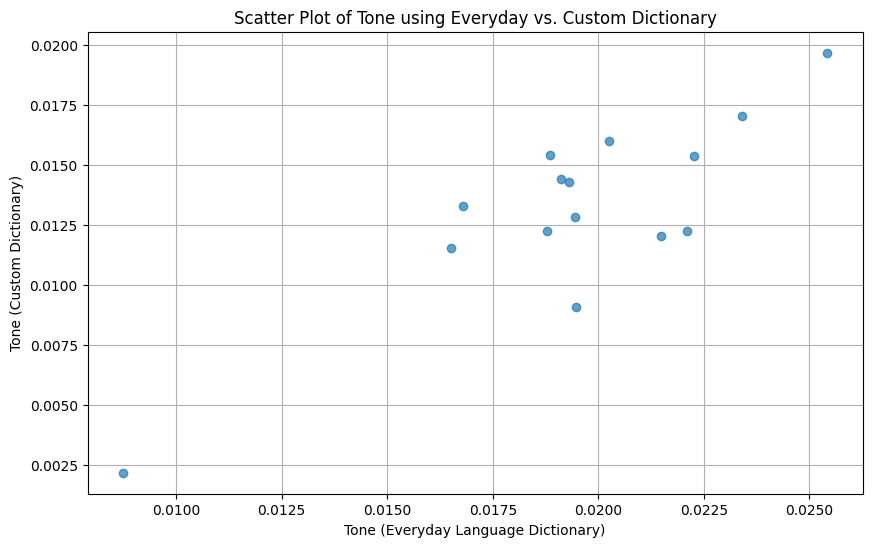

In [ ]:
# scatter of df_counts.tone and df_custom_counts.tone

import matplotlib.pyplot as plt

# Assuming df_counts and df_custom_counts are defined as in your provided code

plt.figure(figsize=(10, 6))
plt.scatter(df_counts['tone'], df_custom_counts['tone'], alpha=0.7)
plt.xlabel("Tone (Everyday Language Dictionary)")
plt.ylabel("Tone (Custom Dictionary)")
plt.title("Scatter Plot of Tone using Everyday vs. Custom Dictionary")
plt.grid(True)
plt.show()


### Custom Dictionary

#### **Exercise: Analyzing Non-Answers in Earnings Calls**

Based on the study by Barth et al. (2022), management non-answers during earnings calls can lead to negative market reactions. The paper highlights the importance of clear communication from management to maintain investor confidence.

In this exercise, we will calculate the frequency of non-answers word-list they introduced in management responses during earnings calls. We will identify which managers in our sample tend to give the most non-answers and analyze how the market reacts to these non-answers.

Steps:
1. Use a predefined dictionary of non-answer `Tri-grams` (as per Barth et al. 2022) to identify non-answers in the transcripts.
2. Calculate the frequency of management non-answers for each earnings call.
3. Analyze the market reaction by comparing stock price movements before and after the earnings call.
4. Make sure the regression has proper control variables

Reference: Barth et al. (2022).[Link to paper](https://pubsonline.informs.org/doi/abs/10.1287/mnsc.2022.4597?journalCode=mnsc)

In [ ]:
# Step 0: make sure we have the dataset of answers and the short subsample for faster calculations

Sample_Answers= Sample_QAs[Sample_QAs['QA'] == 'a'].groupby('file_name')['QA_text'].apply(lambda texts: ' '.join(texts)).reset_index()
Sample_answers = Sample_EC.merge(Sample_Answers).sample(500, random_state=42)

In [ ]:
# Step 1: getting the wordlist

# The original code snippet is commented out, so let's simplify it using pd.read_csv directly.
url = "https://www.dropbox.com/scl/fi/tf46e8ua4brxexlqp84a0/Glossary.csv?rlkey=w9rga54nkgjzfm57i5a8nw3x8&dl=1"

glossary = pd.read_csv(url)
# Replace underscores with spaces
glossary.replace(to_replace=r'_', value=' ', regex=True, inplace=True)
glossary



,term,w
0,back to you,20.788545
1,not sure i,13.913191
2,early to tell,13.767879
3,going to let,13.335014
4,of my head,12.981812
...,...,...
1360,is going on,0.100483
1361,to try to,0.099016
1362,thats going to,0.046942
1363,what we believe,0.009715


In [ ]:
# Step 2(a): define the function to count wordlist items in a text

def count_non_answers(text, non_answer_trigrams=glossary.term.to_list()):
    # This function will count the occurrences of non-answer tri-grams in the given text
    text_lower = text.lower()
    NonAns= sum([text.count(x) for x in non_answer_trigrams]) / len(text.split())
    return NonAns

In [ ]:
# Step 2(b): Apply the function to the Sample_answers['QA_text']
Sample_answers['Non_ans'] = Sample_answers['QA_text'].apply(count_non_answers)
Sample_answers

,GVKEY,date_rdq,co_conm,file_name,CAR-11-Carhart,CAR-11-ff3,CAR01-Carhart,CAR01-ff3,IV,hvol,...,epspxq,epspiq,dlttq,dlcq,prccq,cshoq,dvpq,xintq,QA_text,Non_ans
612,61676.0,2018-07-25 20:45:00+00:00,CITRIX SYSTEMS INC,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2018...,0.034031,0.032347,0.032347,0.038864,0.202767,0.240580,...,0.79,0.79,741.277,1406.157,104.84,135.418,0.0,20.542,"Sure, Phil. Thanks very much. I mean, you take...",0.046246
1684,24316.0,2017-11-08 22:00:00+00:00,MONSTER BEVERAGE CORP,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2017...,0.008227,0.012959,0.012959,0.011762,0.222036,0.132594,...,0.39,0.39,0.000,NaN,55.25,563.959,0.0,NaN,"Well, Judy, we've always said that the interna...",0.032141
1357,5568.0,2017-05-03 21:00:00+00:00,KRAFT HEINZ CO,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2017...,-0.001367,-0.007211,-0.007211,0.001373,0.158177,0.105252,...,0.73,0.73,29748.000,2932.000,90.81,1217.543,0.0,313.000,"Ken, this is Paulo. Sorry, I don't remember we...",0.036540
2826,7977.0,2017-04-27 14:00:00+00:00,XCEL ENERGY INC,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2017...,-0.008598,-0.008740,-0.008740,-0.011437,0.152770,0.073187,...,0.47,0.47,13696.461,1360.448,44.45,507.763,0.0,166.000,"Ali, are you talking about the placeholder tha...",0.039754
1047,61739.0,2018-04-27 13:00:00+00:00,HARTFORD FINANCIAL SERVICES,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2018...,0.043085,0.043794,0.043794,0.038879,0.211559,0.271090,...,1.20,1.67,4755.000,584.000,51.52,358.077,0.0,80.000,"Yes. Jay, it's Chris. On both these, we'll tag...",0.048072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,4321.0,2019-08-06 18:00:00+00:00,EMERSON ELECTRIC CO,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2019...,-0.004239,-0.003926,-0.003926,-0.008366,0.278414,0.364728,...,0.98,0.98,4336.000,1877.000,66.72,615.100,0.0,50.000,From the perspective -- our underlying growth ...,0.057641
313,1913.0,2018-01-31 17:00:00+00:00,AVERY DENNISON CORP,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2018...,0.014644,0.017443,0.017443,0.025158,0.204122,0.328410,...,-0.66,-0.66,1316.300,265.400,114.86,88.012,0.0,13.300,"Yes. Overall, in 2017, as we mentioned, I thin...",0.034634
1874,7922.0,2020-08-25 20:45:00+00:00,NORDSTROM INC,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2020...,0.006907,0.001895,0.001895,-0.031739,0.759828,0.811880,...,-1.62,-1.62,5048.000,772.000,13.69,157.100,0.0,51.000,"Omar, thank you for the question. So Erik, why...",0.049554
2177,64891.0,2020-08-04 13:00:00+00:00,RALPH LAUREN CORP,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2020...,-0.054589,-0.055709,-0.055709,-0.032162,0.462910,0.374340,...,-1.75,-1.75,3337.500,624.000,72.52,73.100,0.0,9.600,"Laurent, welcome back and thank you for your q...",0.035647


In [ ]:
# Step 3: Run the regression on Market reaction
import statsmodels.api as sm

# Prepare the data for regression
depentent_var = 'CAR-11-Carhart'
independent_vars = ['Non_ans','SurpDec']

Sample_answers.dropna(subset=independent_vars + [depentent_var], inplace=True)


X = Sample_answers[independent_vars]
y = Sample_answers[depentent_var]

# Add a constant to the independent variables
X = sm.add_constant(X)
X = X.dropna()
y = y.loc[X.index]  # Ensure indices match after dropping NaN values
X = X.apply(pd.to_numeric, errors='coerce')  # Convert non-numeric to NaN
y = pd.to_numeric(y, errors='coerce')

# Fit the regression model
ols_model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:         CAR-11-Carhart   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     15.94
Date:                Fri, 21 Mar 2025   Prob (F-statistic):           1.98e-07
Time:                        09:11:49   Log-Likelihood:                 685.82
No. Observations:                 487   AIC:                            -1366.
Df Residuals:                     484   BIC:                            -1353.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.013      0.060      0.9

In [ ]:
# Step 4: what additional controls do we need?